# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [26]:

import plotly.express as px
from plotly import graph_objects
import yfinance as yf


import datetime as dt
import pandas as pd
import numpy as np

import plotly.io as pio

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [ ]:
ativos = ['WEGE3.SA', 'ITSA4.SA', 'HGRE11.SA']
dt_ini, dt_fim = '2021-01-01', '2021-07-01'


# Baixar os dados com yfinance
dados = yf.download(ativos, start=dt_ini, end=dt_fim)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [3]:
print(dados)

Price            Close                             High                       \
Ticker       HGRE11.SA  ITSA4.SA   WEGE3.SA   HGRE11.SA  ITSA4.SA   WEGE3.SA   
Date                                                                           
2021-01-04  117.847740  6.580600  34.756058  120.933296  6.745827  35.580476   
2021-01-05  117.235229  6.529325  36.889294  118.227565  6.552116  36.889294   
2021-01-06  116.514214  6.660368  37.867428  117.739130  6.745830  38.878157   
2021-01-07  116.537521  6.928148  39.432434  116.793348  6.962333  39.595454   
2021-01-08  116.405724  6.911056  41.817188  116.979422  7.036401  41.915000   
...                ...       ...        ...         ...       ...        ...   
2021-06-24  102.179657  6.824263  32.138771  102.644808  6.853277  32.204303   
2021-06-25  100.008888  6.661779  31.417925  104.079017  6.830065  32.410265   
2021-06-28  101.133026  6.592144  31.849327  101.543914  6.661780  31.980471   
2021-06-29  102.954910  6.557324  32.505

In [5]:
dados.to_csv('dadosLimpos.csv', sep=',')

In [6]:
dados.shape

(122, 15)

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [7]:
amplitudade = dados['High'] - dados['Low']
amplitudade

Ticker,HGRE11.SA,ITSA4.SA,WEGE3.SA
Date,,,
2021-01-04,3.093304,0.233597,0.880313
2021-01-05,1.550525,0.136740,2.422023
2021-01-06,1.480743,0.244992,2.487235
2021-01-07,0.891548,0.336152,1.476506
2021-01-08,1.457498,0.188017,2.394078
...,...,...,...
2021-06-24,1.674559,0.121862,0.477449
2021-06-25,4.690342,0.208906,1.235746
2021-06-28,3.822040,0.150877,1.208402


In [9]:
print(dados.head)

<bound method NDFrame.head of Price            Close                             High                       \
Ticker       HGRE11.SA  ITSA4.SA   WEGE3.SA   HGRE11.SA  ITSA4.SA   WEGE3.SA   
Date                                                                           
2021-01-04  117.847740  6.580600  34.756058  120.933296  6.745827  35.580476   
2021-01-05  117.235229  6.529325  36.889294  118.227565  6.552116  36.889294   
2021-01-06  116.514214  6.660368  37.867428  117.739130  6.745830  38.878157   
2021-01-07  116.537521  6.928148  39.432434  116.793348  6.962333  39.595454   
2021-01-08  116.405724  6.911056  41.817188  116.979422  7.036401  41.915000   
...                ...       ...        ...         ...       ...        ...   
2021-06-24  102.179657  6.824263  32.138771  102.644808  6.853277  32.204303   
2021-06-25  100.008888  6.661779  31.417925  104.079017  6.830065  32.410265   
2021-06-28  101.133026  6.592144  31.849327  101.543914  6.661780  31.980471   
2021-06-29

In [22]:
amplitudade_vertical = dados['Close'].stack().reset_index()
amplitudade_vertical.columns = ['data', 'ativo', 'valor']

amplitudade_vertical.head()

,data,ativo,valor
0,2021-01-04,HGRE11.SA,117.847740
1,2021-01-04,ITSA4.SA,6.580600
2,2021-01-04,WEGE3.SA,34.756058
3,2021-01-05,HGRE11.SA,117.235229
4,2021-01-05,ITSA4.SA,6.529325


In [30]:
fig = px.line(amplitudade_vertical, x='data', y='valor', color='ativo', template='plotly_dark')
fig.write_html("grafico_interativo.html")

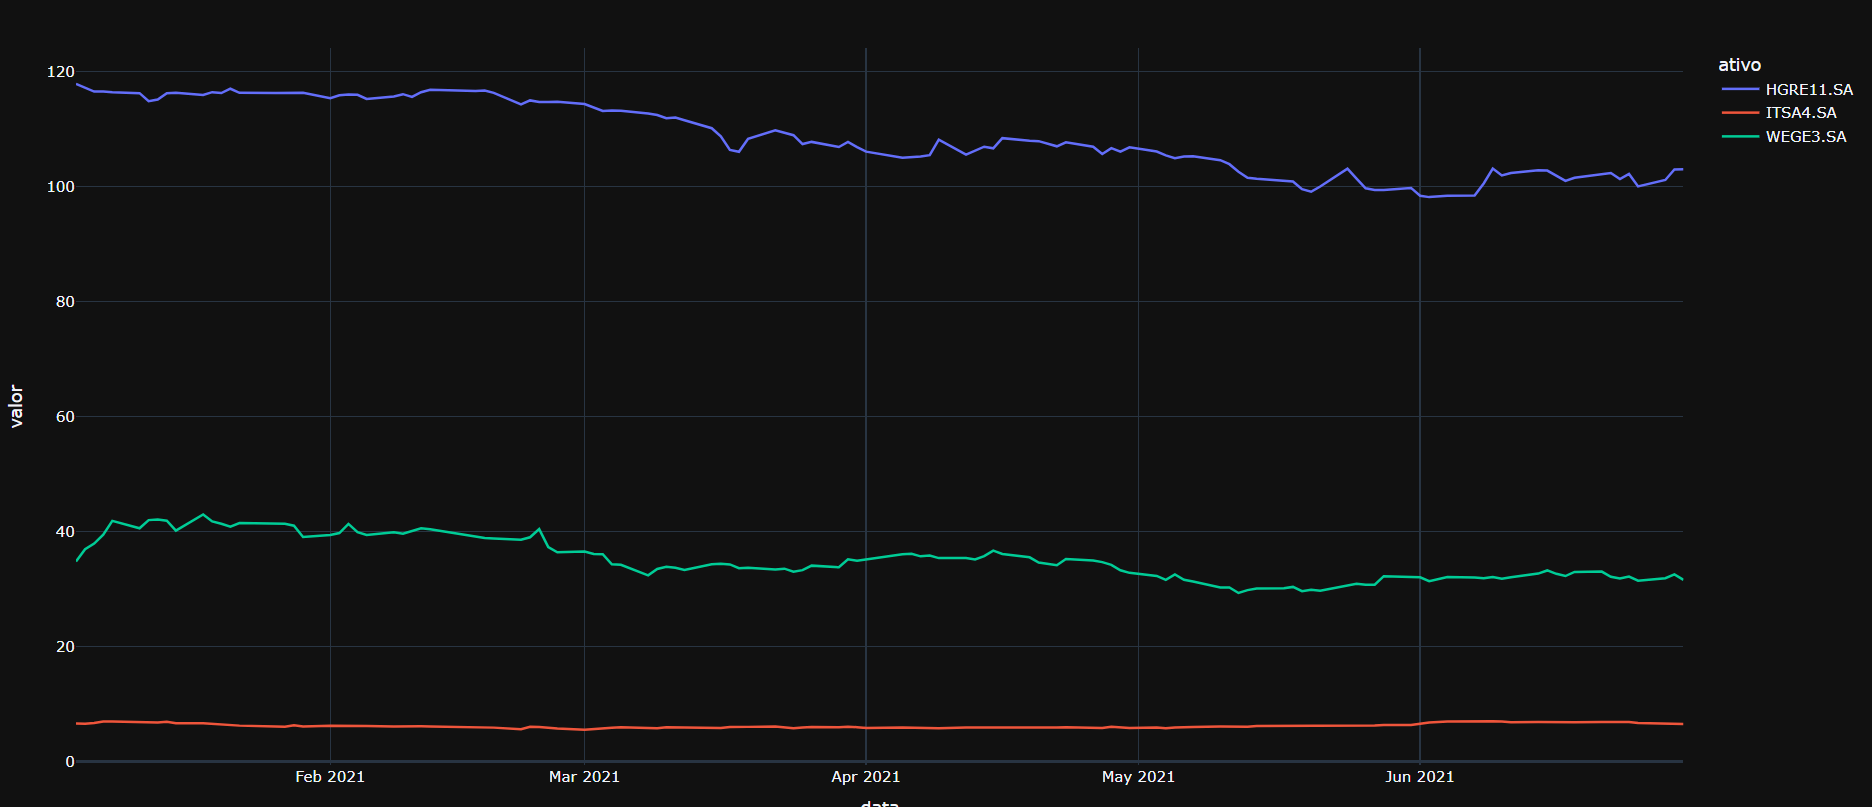

In [31]:
fig = px.line(amplitudade_vertical, x='data', y='valor', color='ativo', template='plotly_white')
fig.write_html("grafico_interativo.html")

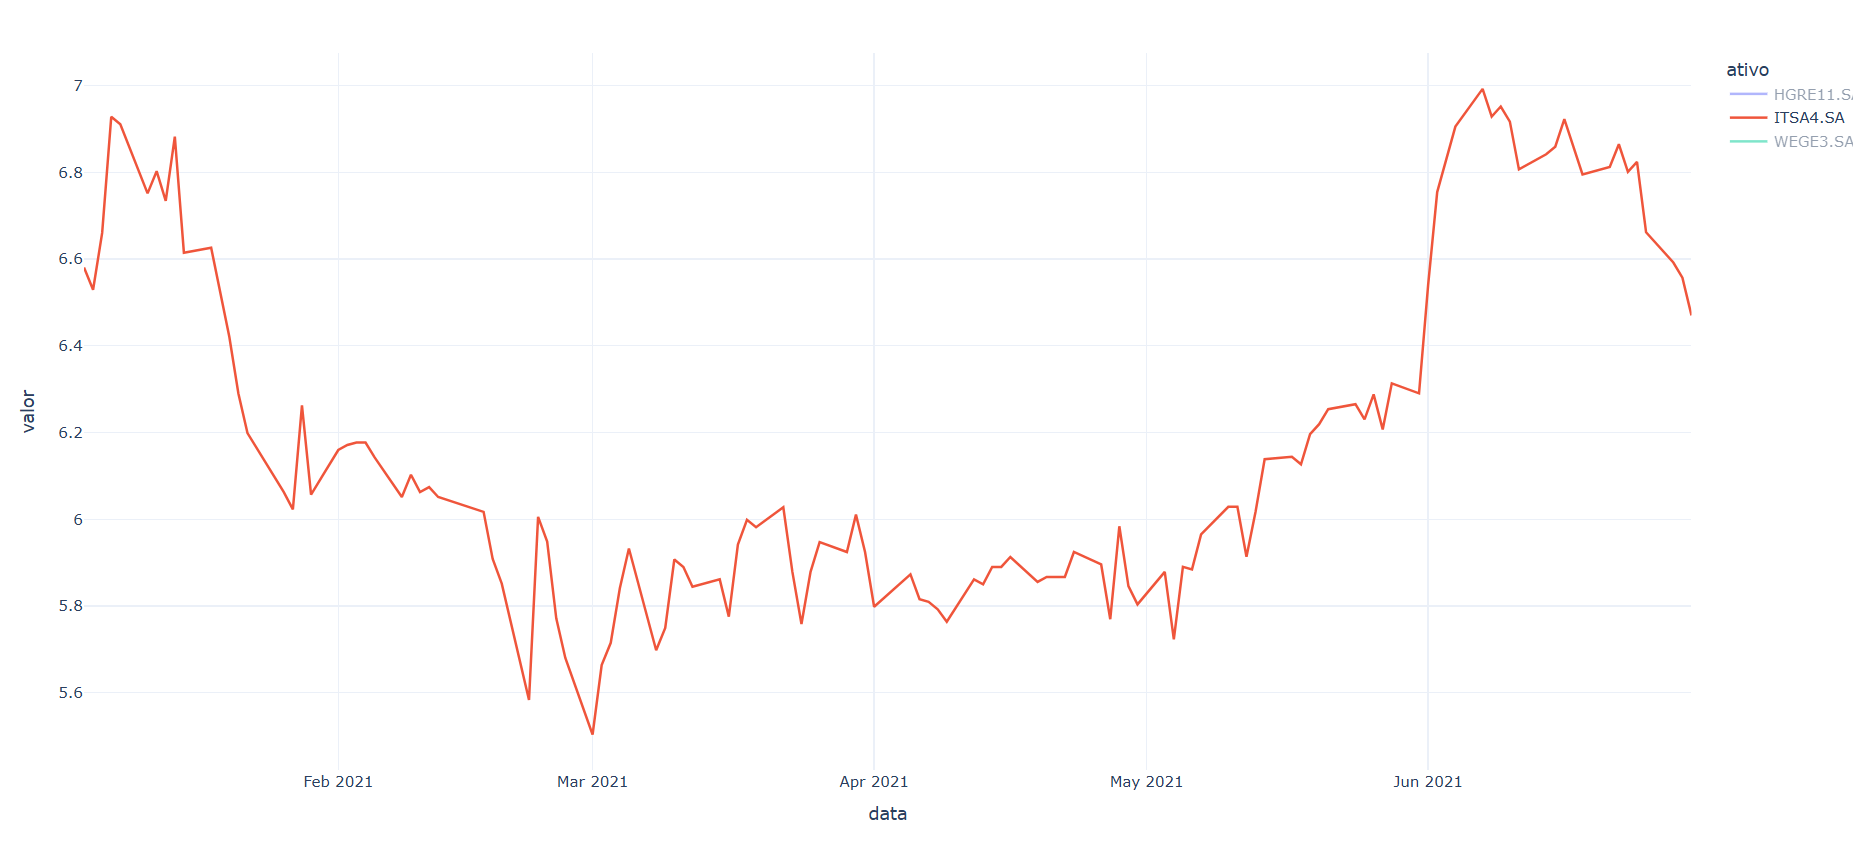